In [13]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
from scipy.linalg import eig
import sympy as sp

g = 32.17
# symbol_lo = ["∆µ ", "∆α ", "∆q ", "∆ξx", "∆ξz", "∆θ "]
# symbol_la = ["∆β ", "∆p ", "∆r̄ ", "∆ξy", "∆ϕ ", "∆ψ "]
symbol_lo = ["delta mu   ", "delta alpla", "delta q    ", "delta zetax", "delta zetaz", "delta theta"]
symbol_la = ["delta beta ", "delta q    ", "delta rbar ", "delta zetay", "delta phi  ", "delta psi  "]
################################################################

# ======================================================================
def printMat(arr):
    shape = np.shape(arr)
    for i in range(shape[0]):
        for j in range(shape[1]):
            print("{:> 17.12f}".format(arr[i, j]), end="")
        print("", end="\n")

def printMatToFile(arr, filename, variableName):
    with open(filename, "a") as f:
        shape = np.shape(arr)
        print("==================== ", variableName, " ================", end="\n", file=f)
        for i in range(shape[0]):
            for j in range(shape[1]):
                print("{:> 17.12f}".format(arr[i, j]), end="", file=f)
            print("", end="\n", file=f)

def error(A, B):
    err = (B - A) * 100 / A
    return err
# ======================================================================

class glider:
    def __init__(self, name):
        self.filename     = name
        self.vinf         = None
        self.Sw           = None
        self.bw           = None
        self.W            = None
        self.Ixx          = None
        self.Iyy          = None
        self.Izz          = None
        self.Ixy          = None
        self.Ixz          = None
        self.Iyz          = None
        self.rho          = None
        self.alpha        = None
        self.CL_0         = None
        self.CL_alpha     = None
        self.CL_qbar      = None
        self.CL_alpha_hat = None
        self.CL_1         = None
        self.CD_L0        = None
        self.CD_L         = None
        self.CD_L2        = None
        self.CD_qbar      = None
        self.CD_Lqbar     = None
        self.CD_L2qbar    = None
        self.CD_qbar      = None
        self.Cm_0         = None
        self.Cm_alpha     = None
        self.Cm_qbar      = None
        self.Cm_alpha_hat = None
        self.CD_0         = None
        self.CD_1         = None
        self.CD_2         = None
        self.Cm_o         = None
        self.theta_o      = None
        self.phi_o        = None
        self.alpha_T0     = None
        self.V_o          = None
        self.CL_o         = None
        self.CY_beta      = None
        self.CY_pbar      = None
        self.CY_Lpbar     = None
        self.CY_rbar      = None
        self.CY_pbar      = None
        self.Cl_beta      = None
        self.Cl_pbar      = None
        self.Cl_rbar      = None
        self.Cl_Lrbar     = None
        self.Cl_rbar      = None
        self.Cn_beta      = None
        self.Cn_pbar      = None
        self.Cn_Lpbar     = None
        self.Cn_rbar      = None
        self.Cn_pbar      = None
        self.cw           = None
        self.CD_o         = None
        self.CD_alpha     = None
        self.T_v          = None
        self.Z_T0         = None
        self.CD_alpha_hat = None
        self.CD_nu_hat    = None
        self.CL_mu_hat    = None
        self.Cm_mu_hat    = None
        self.R_gx         = None
        self.R_gy         = None
        self.R_rhox       = None
        self.R_rhoy       = None
        self.R_xx         = None
        self.R_yy         = None
        self.R_zz         = None
        self.R_xz         = None
        self.CT_V         = None
        self.A_mat_lo     = None
        self.B_mat_lo     = None
        self.A_mat_la     = None
        self.B_mat_la     = None
        self.C_lo         = None
        self.C_la         = None
        self.eigvals_lo   = None
        self.eigvecs_lo   = None
        self.eigvals_la   = None
        self.eigvecs_la   = None


        self.amps_lo           = None
        self.phase_lo          = None
        self.eigvals_lo_mag    = None
        self.sort_index        = None
        self.sigma_sp          = None
        self.sigma_sp99        = None
        self.sigma_sp_1        = None
        self.sigma_sp99_1      = None
        self.zeta_sp           = None
        self.sigma_ph          = None
        self.sigma_ph99        = None
        self.sigma_ph_1        = None
        self.sigma_ph99_1      = None
        self.omega_d_ph        = None
        self.period_ph         = None
        self.zeta_ph           = None
        self.A_sp              = None
        self.B_sp              = None
        self.C_sp              = None
        self.sigma_sp_approx   = None
        self.omega_d_sp_approx = None
        self.omega_n_sp_approx = None
        self.sigma_D           = None
        self.sigma_q           = None
        self.R_ps              = None
        self.sigma_phi         = None
        self.sigma_ph_approx   = None
        self.omega_d_ph_approx = None
        self.llambda_sp        = None
        self.llambda_p         = None

        self.amps_la       = None
        self.phase_la      = None
        self.dump_max      = None
        self.non_zero_real = None
        self.dump_min      = None
        self.index_roll    = None
        self.index_spiral  = None
        self.index_Dutch   = None
        self.eig_roll      = None
        self.sigma_roll    = None
        self.sigma99_roll  = None
        self.eig_spiral    = None
        self.sigma_spiral  = None
        self.doubling_time = None
        self.eig_Dutch     = None
        self.sigma_Dutch   = None
        self.sigma99_Dutch = None
        self.omega_d_Dutch = None
        self.omega_n_Dutch = None
        self.zeta_Dutch    = None

        self.llambda_r             = None
        self.sigma_roll_appox      = None
        self.llambda_s             = None
        self.sigma_spiral_approx   = None
        self.R_Ds                  = None
        self.omega_d_Dutch_approx  = None
        self.sigma_Dutch_approx    = None
        self.llambda_DR            = None

        self.CW = None
        self.CAP = None

    def open(self):
        with open(self.filename, "r", encoding="utf-8") as f:
            data = json.load(f)

        self.vinf         = data["initial"]["airspeed[ft/s]"]
        self.Sw           = data["aircraft"]["wing_area[ft^2]"]
        self.bw           = data["aircraft"]["wing_span[ft]"]
        self.W            = data["aircraft"]["weight[lbf]"]
        self.Ixx          = data["aircraft"]["Ixx[slug-ft^2]"]
        self.Iyy          = data["aircraft"]["Iyy[slug-ft^2]"]
        self.Izz          = data["aircraft"]["Izz[slug-ft^2]"]
        self.Ixy          = data["aircraft"]["Ixy[slug-ft^2]"]
        self.Ixz          = data["aircraft"]["Ixz[slug-ft^2]"]
        self.Iyz          = data["aircraft"]["Iyz[slug-ft^2]"]

        try:
            self.rho      = data["analysis"]["density[slugs/ft^3]"]
        except:
            print("No density data in file, using the default value instead")
            self.rho          = 0.0020664

        self.alpha        = data["initial"]["state"]["alpha[deg]"]

        self.CL_0         = data["aerodynamics"]["CL"]["0"]
        self.CL_alpha     = data["aerodynamics"]["CL"]["alpha"]
        self.CL_qbar      = data["aerodynamics"]["CL"]["qbar"]
        self.CL_alpha_hat = data["aerodynamics"]["CL"]["alpha_hat"]
        self.CL_1         = self.CL_0  + self.CL_alpha * self.alpha

        self.CD_L0        = data["aerodynamics"]["CD"]["L0"]
        self.CD_L         = data["aerodynamics"]["CD"]["L"]
        self.CD_L2        = data["aerodynamics"]["CD"]["L2"]
        self.CD_qbar      = data["aerodynamics"]["CD"]["qbar"]
        self.CD_Lqbar     = data["aerodynamics"]["CD"]["Lqbar"]
        self.CD_L2qbar    = data["aerodynamics"]["CD"]["L2qbar"]
        self.CD_qbar      = self.CD_L2qbar * self.CL_1**2 + self.CD_Lqbar * self.CL_1 + self.CD_qbar

        self.Cm_0         = data["aerodynamics"]["Cm"]["0"]
        self.Cm_alpha     = data["aerodynamics"]["Cm"]["alpha"]
        self.Cm_qbar      = data["aerodynamics"]["Cm"]["qbar"]
        self.Cm_alpha_hat = data["aerodynamics"]["Cm"]["alpha_hat"]

        self.CD_0         = self.CD_L0
        self.CD_1         = self.CD_L
        self.CD_2         = self.CD_L2
        self.Cm_o         = self.Cm_0

        self.theta_o      = 0
        self.phi_o        = 0
        self.alpha_T0     = 0
        self.V_o          = (self.W / (0.5 * self.rho * self.Sw * self.CL_0))**0.5
        self.CL_o         = self.W * np.cos(self.theta_o) / (0.5 * self.rho * self.V_o**2 * self.Sw * np.cos(self.phi_o))
        self.CY_beta      = data["aerodynamics"]["CS"]["beta"]
        self.CY_pbar      = data["aerodynamics"]["CS"]["pbar"]
        self.CY_Lpbar     = data["aerodynamics"]["CS"]["Lpbar"]
        self.CY_rbar      = data["aerodynamics"]["CS"]["rbar"]
        self.CY_pbar      = self.CY_Lpbar * self.CL_1 + self.CY_pbar
        self.Cl_beta      = data["aerodynamics"]["Cl"]["beta"]
        self.Cl_pbar      = data["aerodynamics"]["Cl"]["pbar"]
        self.Cl_rbar      = data["aerodynamics"]["Cl"]["rbar"]
        self.Cl_Lrbar     = data["aerodynamics"]["Cl"]["Lrbar"]
        self.Cl_rbar      = self.Cl_Lrbar * self.CL_1 + self.Cl_rbar
        self.Cn_beta      = data["aerodynamics"]["Cn"]["beta"]
        self.Cn_pbar      = data["aerodynamics"]["Cn"]["pbar"]
        self.Cn_Lpbar     = data["aerodynamics"]["Cn"]["Lpbar"]
        self.Cn_rbar      = data["aerodynamics"]["Cn"]["rbar"]
        self.Cn_pbar      = self.Cn_Lpbar * self.CL_1 + self.Cn_pbar
        self.cw           = self.Sw / self.bw
        self.CD_o         = self.CD_0 + self.CD_1 * self.CL_0 + self.CD_2 * self.CL_0**2
        self.CD_alpha     = self.CD_1 * self.CL_alpha + 2 * self.CD_2 * self.CL_o * self.CL_alpha
        self.T_v          = 0
        self.Z_T0         = 0
        self.CD_alpha_hat = 0
        self.CD_nu_hat    = 0
        self.CL_mu_hat    = 0
        self.Cm_mu_hat    = 0
        self.R_gx         = g * self.cw / (2 * self.V_o**2)
        self.R_gy         = g * self.bw / (2 * self.V_o**2)
        self.R_rhox       = 4 * self.W / (g * self.rho * self.Sw * self.cw)
        self.R_rhoy       = 4 * self.W / (g * self.rho * self.Sw * self.bw)
        self.R_xx         = 8 * self.Ixx / (self.rho   * self.Sw * self.bw**3)
        self.R_yy         = 8 * self.Iyy / (self.rho   * self.Sw * self.cw**3)
        self.R_zz         = 8 * self.Izz / (self.rho   * self.Sw * self.bw**3)
        self.R_xz         = 8 * self.Ixz / (self.rho   * self.Sw * self.bw**3)
        self.CT_V         = self.T_v / 0.5 * self.rho * self.V_o * self.Sw

    def getMatrix(self):
        self.A_mat_lo = np.array([
            [- 2 * self.CD_o + self.CT_V * np.cos(self.alpha_T0),  self.CL_o - self.CD_alpha, -self.CD_qbar              ,  0,     0, -self.R_rhox * self.R_gx * np.cos(self.theta_o)],
            [- 2 * self.CL_o + self.CT_V * np.sin(self.alpha_T0), -self.CL_alpha - self.CD_o, -self.CL_qbar + self.R_rhox,  0,     0, -self.R_rhox * self.R_gx * np.sin(self.theta_o)],
            [  2 * self.Cm_o + self.CT_V * self.Z_T0 / self.cw  ,  self.Cm_alpha            , self.Cm_qbar               ,  0,     0, 0                                              ],
            [np.cos(self.theta_o)                               ,  np.sin(self.theta_o)     , 0                          ,  0,     0, -np.sin(self.theta_o)                          ],
            [- np.sin(self.theta_o)                             ,  np.cos(self.theta_o)     , 0                          ,  0,     0, -np.cos(self.theta_o)                          ],
            [0                                                  ,                     0     , 1                          ,  0,     0, 0                                              ],
        ])


        self.B_mat_lo = np.array([
            [self.R_rhox + self.CD_nu_hat, self.CD_alpha_hat              ,         0,   0, 0, 0],
            [self.CL_mu_hat              , self.R_rhox + self.CL_alpha_hat,         0,   0, 0, 0],
            [-self.Cm_mu_hat             , -self.Cm_alpha_hat             , self.R_yy,   0, 0, 0],
            [0                           ,                     0          ,         0,   1, 0, 0],
            [0                           ,                     0          ,         0,   0, 1, 0],
            [0                           ,                     0          ,         0,   0, 0, 1],

        ])


        self.A_mat_la = np.array([
            [self.CY_beta, self.CY_pbar, self.CY_rbar - self.R_rhoy     ,  0, self.R_rhoy * self.R_gy * np.cos(self.theta_o),      0,],
            [self.Cl_beta, self.Cl_pbar, self.Cl_rbar                   ,  0, 0                              , 0                   , ],
            [self.Cn_beta, self.Cn_pbar, self.Cn_rbar                   ,  0, 0                              , 0                   , ],
            [1           ,            0,      0                         ,  0, 0                              , np.cos(self.theta_o), ],
            [0           ,            1,      np.tan(self.theta_o)      ,  0, 0                              , 0                   , ],
            [0           ,            0,      1 / np.cos(self.theta_o)  ,  0, 0                              , 0                   , ],
        ])


        self.B_mat_la = np.array([
            [self.R_rhoy,     0,          0,   0, 0, 0],
            [0     ,  self.R_xx, -self.R_xz,   0, 0, 0],
            [0     , -self.R_xz,  self.R_zz,   0, 0, 0],
            [0     ,          0,          0,   1, 0, 0],
            [0     ,          0,          0,   0, 1, 0],
            [0     ,          0,          0,   0, 0, 1],

        ])
        self.C_lo = np.matmul(np.linalg.inv(self.B_mat_lo), self.A_mat_lo)
        self.C_la = np.matmul(np.linalg.inv(self.B_mat_la), self.A_mat_la)

    def geteig(self):
        self.eigvals_lo, self.eigvecs_lo = eig(self.C_lo)
        self.eigvals_la, self.eigvecs_la = eig(self.C_la)

    def longitudinal(self):
        self.amps_lo           = (self.eigvecs_lo.real**2 + self.eigvecs_lo.imag**2)**0.5
        self.phase_lo          = np.arctan2(self.eigvecs_lo.imag, self.eigvecs_lo.real)
        self.eigvals_lo_mag    = np.abs(self.eigvals_lo)
        self.sort_index        =  np.argsort(np.abs(self.eigvals_lo))
        self.sigma_sp          = -self.eigvals_lo[self.sort_index[-1]].real * 2 * self.V_o / self.cw
        self.sigma_sp99        = np.log(0.01) /  (- self.sigma_sp)
        self.sigma_sp_1        = -self.eigvals_lo[self.sort_index[-2]].real * 2 * self.V_o / self.cw
        self.sigma_sp99_1      = np.log(0.01) /  (- self.sigma_sp_1)
        self.zeta_sp           = - (self.eigvals_lo[self.sort_index[-1]] + self.eigvals_lo[self.sort_index[-2]]) / (2 * (self.eigvals_lo[self.sort_index[-1]] * self.eigvals_lo[self.sort_index[-2]])**0.5)
        self.sigma_ph          = -self.eigvals_lo[self.sort_index[-3]].real * 2 * self.V_o / self.cw
        self.sigma_ph99        = np.log(0.01) /  (- self.sigma_ph)
        self.sigma_ph_1        = -self.eigvals_lo[self.sort_index[-4]].real * 2 * self.V_o / self.cw
        self.sigma_ph99_1      = np.log(0.01) /  (- self.sigma_ph)
        self.omega_d_ph        = np.abs(self.eigvals_lo[self.sort_index[-3]].imag) * 2 * self.V_o / self.cw
        self.period_ph         = 2 * np.pi / self.omega_d_ph
        self.zeta_ph           = - (self.eigvals_lo[self.sort_index[-3]] + self.eigvals_lo[self.sort_index[-4]]) / (2 * (self.eigvals_lo[self.sort_index[-3]] * self.eigvals_lo[self.sort_index[-4]])**0.5)
        self.A_sp              = self.R_yy * (self.R_rhox + self.CL_alpha_hat)
        self.B_sp              = self.R_yy * (self.CL_alpha + self.CD_o) - self.Cm_qbar * (self.R_rhox + self.CL_alpha_hat)  - self.Cm_alpha_hat * (self.R_rhox - self.CL_qbar)
        self.C_sp              = - self.Cm_qbar * (self.CL_alpha + self.CD_o) - self.Cm_alpha * (self.R_rhox - self.CL_qbar)
        self.sigma_sp_approx   = self.V_o * self.B_sp / (self.cw * self.A_sp)
        self.omega_d_sp_approx = (self.V_o / self.cw) * np.abs((self.B_sp**2 - 4 * self.A_sp * self.C_sp)**0.5 / (self.A_sp))
        self.omega_n_sp_approx = (self.eigvals_lo[self.sort_index[-1]] * self.eigvals_lo[self.sort_index[-2]])**0.5 * 2 * self.V_o / self.cw
        self.sigma_D           = g * self.CD_o / (self.V_o * self.CL_o)
        self.sigma_q           = (g / self.V_o) * ((self.CL_o - self.CD_alpha) * self.Cm_qbar / (self.R_rhox * self.Cm_alpha + (self.CD_o + self.CL_alpha) * self.Cm_qbar))
        self.R_ps              = self.R_rhox * self.Cm_alpha / (self.R_rhox * self.Cm_alpha + (self.CD_o + self.CL_alpha) * self.Cm_qbar)
        self.sigma_phi         = - (g / self.V_o) * self.R_gx * self.R_ps *((self.R_rhox * self.Cm_qbar - self.R_yy * (self.CD_o + self.CL_alpha)) / (self.R_rhox * self.Cm_alpha + (self.CD_o + self.CL_alpha) * self.Cm_qbar))
        self.sigma_ph_approx   = self.sigma_D + self.sigma_q + self.sigma_phi
        self.omega_d_ph_approx = (2 * (g / self.V_o)**2 * self.R_ps - (self.sigma_D + self.sigma_q)**2)**0.5
        self.llambda_sp        = np.empty((2), dtype=complex)
        self.llambda_sp[0]     = self.cw * complex(- self.sigma_sp_approx, self.omega_d_sp_approx)  / (2 * self.V_o)
        self.llambda_sp[1]     = self.cw * complex(- self.sigma_sp_approx, -self.omega_d_sp_approx) / (2 * self.V_o)
        self.llambda_p         = np.empty((2), dtype=complex)
        self.llambda_p[0]      = self.cw * complex(- self.sigma_ph_approx, self.omega_d_ph_approx)  / (2 * self.V_o)
        self.llambda_p[1]      = self.cw * complex(- self.sigma_ph_approx, -self.omega_d_ph_approx) / (2 * self.V_o)

    def lateral(self):
        # self.N = len(eigvals_la)
        self.amps_la  = (self.eigvecs_la.real**2 + self.eigvecs_la.imag**2)**0.5
        self.phase_la = np.arctan2(self.eigvecs_la.imag, self.eigvecs_la.real)

        # ====== find the location of each mode ================================
        self.dump_max      = np.max(np.abs(self.eigvals_la.real))
        self.non_zero_real = np.where(np.abs(self.eigvals_la.real) != 0)
        self.dump_min      = np.min(np.abs(self.eigvals_la[self.non_zero_real]))

        self.index_roll   = np.where(np.abs(self.eigvals_la.real) == self.dump_max)[0]
        self.index_spiral = np.where(np.abs(self.eigvals_la) == self.dump_min)[0]
        self.index_Dutch  = np.where(self.eigvals_la.imag != 0)[0]

        # ============== roll mode =============================================
        self.eig_roll     = self.eigvals_la[self.index_roll]
        self.sigma_roll   = - self.eig_roll[0].real * 2 * self.V_o / self.bw
        self.sigma99_roll = np.log(0.01) / (- self.sigma_roll)

        # ============== spiral mode ===========================================
        self.eig_spiral    = self.eigvals_la[self.index_spiral]
        self.sigma_spiral  = - self.eig_spiral[0].real * 2 * self.V_o / self.bw
        self.doubling_time = - np.log(2) / self.sigma_spiral

        # ============== Dutch mode ============================================
        self.eig_Dutch     = self.eigvals_la[self.index_Dutch]
        self.sigma_Dutch   = - self.eig_Dutch[0].real * 2 * self.V_o / self.bw
        self.sigma99_Dutch = np.log(0.01) / (- self.sigma_Dutch)
        self.omega_d_Dutch = np.abs(self.eig_Dutch[0].imag) * 2 * self.V_o / self.bw
        self.omega_n_Dutch = (self.eig_Dutch[0] * self.eig_Dutch[1]) *  2 * self.V_o / self.bw
        self.zeta_Dutch    = - (self.eig_Dutch[0] + self.eig_Dutch[1]) / (2 * (self.eig_Dutch[0] * self.eig_Dutch[1])**0.5)

        # =============== lateral approximation ================================
        self.llambda_r             = self.Cl_pbar / self.R_xx
        self.sigma_roll_appox      = - self.rho * self.Sw * self.bw**2 * self.V_o * self.Cl_pbar / (4 * self.Ixx)
        self.llambda_s             = - (g * self.bw / (2 * self.V_o**2)) * ((self.Cl_beta * self.Cn_rbar - self.Cl_rbar * self.Cn_beta) / (self.Cl_beta * self.Cn_pbar - self.Cl_pbar * self.Cn_beta))
        self.sigma_spiral_approx   =   (g / self.V_o) * ((self.Cl_beta * self.Cn_rbar - self.Cl_rbar * self.Cn_beta) / (self.Cl_beta * self.Cn_pbar - self.Cl_pbar * self.Cn_beta))
        self.R_Ds                  = (self.Cl_beta * (self.R_gy * self.R_rhoy * self.R_zz - (self.R_rhoy - self.CY_rbar) * self.Cn_pbar) - self.CY_beta * self.Cl_rbar * self.Cn_pbar) / (self.R_rhoy * self.R_zz * self.Cl_pbar)
        self.omega_d_Dutch_approx  = (2 * self.V_o / self.bw) * ((1 - (self.CY_rbar / self.R_rhoy)) * (self.Cn_beta / self.R_zz)
                                    + ((self.CY_beta * self.Cn_rbar) / (self.R_rhoy * self.R_zz))
                                    + self.R_Ds
                                    - 0.25 * ((self.CY_beta / self.R_rhoy) + (self.Cn_rbar / self.R_zz))**2)**0.5
        self.sigma_Dutch_approx    = - (self.V_o / self.bw) * (
                                    + self.CY_beta / self.R_rhoy
                                    + self.Cn_rbar / self.R_zz
                                    - (self.Cl_rbar * self.Cn_pbar) / (self.Cl_pbar * self.R_zz)
                                    + (self.R_gy * (self.Cl_rbar * self.Cn_beta - self.Cl_beta * self.Cn_rbar)) / (self.Cl_pbar * (self.Cn_beta + self.CY_beta * self.Cn_rbar / self.R_rhoy))
                                    - self.R_xx * self.R_Ds / self.Cl_pbar
                                )
        self.llambda_DR            = np.empty((2), dtype=complex)
        self.llambda_DR[0]         = self.cw * complex(- self.sigma_Dutch_approx,  self.omega_d_Dutch_approx) / (2 * self.V_o)
        self.llambda_DR[1]         = self.cw * complex(- self.sigma_Dutch_approx, -self.omega_d_Dutch_approx) / (2 * self.V_o)

    def printtotxt(self):
        # ============== print to file =========================================
        filename = "longitudinal.txt"
        with open(filename, "w", encoding="utf-8") as f:
            f.write(" ")

        printMatToFile(self.A_mat_lo, filename, "A Matrix")
        printMatToFile(self.B_mat_lo, filename, "B Matrix")
        printMatToFile(self.C_lo, filename, "C Matrix")


        with open(filename, "a", encoding="utf-8") as f: # print longitydinal result
            for i in range(6):
                print("=============================================================", file=f)
                print("eigenvalue = ", "{:.12f}".format(self.eigvals_lo[i]), file=f)
                print("                 real", "            image", "            phase", "              Amp", file=f)
                for j in range(6):
                    print(symbol_lo[j],
                        "{:>17.12f}".format(self.eigvecs_lo[j, i].real),
                        "{:>17.12f}".format(self.eigvecs_lo[j, i].imag),
                        "{:>17.12f}".format(np.rad2deg(self.phase_lo[j, i])),
                        "{:>17.12f}".format(self.amps_lo[j, i]), file=f)

                dampingRate   = -self.eigvals_lo[i].real
                dampingRate99 = np.log(0.01) / -dampingRate
                self.doubling_time = -np.log(2) / dampingRate
                freq          = abs(-self.eigvals_lo[i].imag)
                period        = 2 * np.pi / freq

                print("damping rate             =", "{:.12f}".format(dampingRate), file=f)
                if dampingRate > 0:
                    print("99% damping rate         =", "{:.12f}".format(dampingRate99), file=f)
                else:
                    print("Doubling time            =", "{:.12f}".format(self.doubling_time), file=f)
                print("damped natural frequency =", "{:.12f}".format(freq), file=f)
                print("damped natural period    =", "{:.12f}".format(period), file=f)

            roots = np.unique(abs(self.eigvals_lo.imag))
            pairs = [i for i in roots if i != 0]
            print("\n==================== ", "complex Pairs", " =========================", end="\n", file=f)
            for i in range(len(pairs)):
                index_pair = np.where(abs(self.eigvals_lo.imag) == pairs[i])[0]
                print("complex pairs:", "{:.12f}".format(self.eigvals_lo[index_pair[0]]), file=f)
                print("              ", "{:.12f}".format(self.eigvals_lo[index_pair[1]]), file=f)

                omega_n = (self.eigvals_lo[index_pair[0]] * self.eigvals_lo[index_pair[1]])**0.5
                zeta = - (self.eigvals_lo[index_pair[0]] + self.eigvals_lo[index_pair[1]]) / \
                    (2 * (self.eigvals_lo[index_pair[0]] * self.eigvals_lo[index_pair[1]])**0.5)
                print("damping ratio             =", "{:.12f}".format(zeta.real), file=f)
                print("undamped natural frequecy =", "{:.12f}".format(omega_n.real), file=f)


            print("=============================================================\n\n\n", file=f)

            print("##################### short period ##########################", file=f)
            print("eigenvalues       =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-1]]), file=f)
            print("                  =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-2]]), file=f)
            print("========================================", file=f)
            print("damping rate      =",      "{:.6f}".format(self.sigma_sp), file=f)
            print("99\% damping rate =", "{:.6f}".format(self.sigma_sp99), file=f)
            print("======== or ========", file=f)
            print("damping rate      =",      "{:.6f}".format(self.sigma_sp_1), file=f)
            print("99% damping rate =", "{:.6f}".format(self.sigma_sp99_1), file=f)
            print("====================", file=f)
            print("damped frequency  = none" , file=f)
            print("period            = none", file=f)
            print("====================\n", file=f)

            print("##################### phugoid period ########################", file=f)
            print("eigenvalues       =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-3]]), file=f)
            print("                  =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-4]]), file=f)
            print("damping rate      =", "{:.6f}".format(self.sigma_ph), file=f)
            print("99% damping rate  =", "{:.6f}".format(self.sigma_ph99), file=f)
            print("======== or ========", file=f)
            print("damping rate      =", "{:.6f}".format(self.sigma_ph_1), file=f)
            print("99% damping rate  =", "{:.6f}".format(self.sigma_ph99_1), file=f)
            print("====================", file=f)
            print("damped frequency  =", "{:.6f}".format(self.omega_d_ph), file=f)
            print("period            =", "{:.6f}".format(self.period_ph), file=f)
            print("====================\n", file=f)

            print("##################### short period approximation ############", file=f)
            print("eigenvalues       =", "{:.6f}".format(self.llambda_sp[0]), file=f)
            print("                  =", "{:.6f}".format(self.llambda_sp[1]), file=f)
            print("damping rate      =", "{:.6f}".format(self.sigma_sp_approx),   file=f)
            print("99% damping rate  =", "{:.6f}".format(np.log(0.01) / (- self.sigma_sp_approx)), file=f)
            print("damped frequency  =", "{:.6f}".format(self.omega_d_sp_approx), file=f)
            print("period            =", "{:.6f}".format(2 * np.pi / self.omega_d_sp_approx), file=f)
            print("============== error ===================", file=f)
            print("damping rate      =", "{:.6f}".format(error(self.sigma_sp, self.sigma_sp_approx)),   file=f)
            print("99% damping rate  =", "{:.6f}".format(error(self.sigma_sp99, np.log(0.01) / (- self.sigma_sp_approx))), file=f)
            print("========================================\n", file=f)

            print("##################### phugoid period approximation ##########", file=f)
            print("eigenvalues       =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-3]]), file=f)
            print("                  =", "{:.6f}".format(-self.eigvals_lo[self.sort_index[-4]]), file=f)
            print("damping rate      =", "{:.6f}".format(self.sigma_ph_approx),   file=f)
            print("99% damping rate  =", "{:.6f}".format(np.log(0.01) / (- self.sigma_ph_approx)), file=f)
            print("damped frequency  =", "{:.6f}".format(self.omega_d_ph_approx), file=f)
            print("period            =", "{:.6f}".format(2 * np.pi / self.omega_d_ph_approx), file=f)
            print("============== error ===================", file=f)
            print("damping rate      =", "{:.6f}".format(error(self.sigma_ph ,self.sigma_ph_approx)),   file=f)
            print("99% damping rate  =", "{:.6f}".format(error(self.sigma_ph99, np.log(0.01) / (- self.sigma_ph_approx))), file=f)
            print("damped frequency  =", "{:.6f}".format(error(self.omega_d_ph, self.omega_d_ph_approx)), file=f)
            print("period            =", "{:.6f}".format(error(2 * np.pi / self.omega_d_ph, 2 * np.pi / self.omega_d_ph_approx)), file=f)
            print("========================================\n", file=f)

        # ========= write into a file ==========================================
        filename = "Lateral.txt"
        with open(filename, "w", encoding="utf-8") as f:
            f.write(" ")

        printMatToFile(self.A_mat_la, filename, "A Matrix")
        printMatToFile(self.B_mat_la, filename, "B Matrix")
        printMatToFile(self.C_la,     filename, "C Matrix")


        with open(filename, "a", encoding="utf-8") as f: # print lateral result
            for i in range(6):
                print("=============================================================", file=f)
                print("eigenvalue = ", "{:.12f}".format(self.eigvals_la[i]), file=f)
                print("                 real", "            image", "            phase", "              Amp", file=f)
                for j in range(6):
                    print(symbol_lo[j],
                            "{:>17.12f}".format(self.eigvecs_la[j, i].real),
                            "{:>17.12f}".format(self.eigvecs_la[j, i].imag),
                            "{:>17.12f}".format(np.rad2deg(self.phase_lo[j, i])),
                            "{:>17.12f}".format(self.amps_lo[j, i]), file=f)

                dampingRate   = -self.eigvals_la[i].real
                dampingRate99 = np.log(0.01) / -dampingRate
                self.doubling_time = -np.log(2) / dampingRate
                freq          = abs(-self.eigvals_la[i].imag)
                period        = 2 * np.pi / freq

                print("damping rate             =", "{:.12f}".format(dampingRate), file=f)
                if dampingRate > 0:
                    print("99% damping rate         =", "{:.12f}".format(dampingRate99), file=f)
                else:
                    print("Doubling time            =", "{:.12f}".format(self.doubling_time), file=f)
                print("damped natural frequency =", "{:.12f}".format(freq), file=f)
                print("damped natural period    =", "{:.12f}".format(period), file=f)

            roots = np.unique(abs(self.eigvals_la.imag))
            pairs = [i for i in roots if i != 0]
            print("\n==================== ", "complex Pairs", " =========================", end="\n", file=f)
            for i in range(len(pairs)):
                index_pair = np.where(abs(self.eigvals_la.imag) == pairs[i])[0]
                print("complex pairs:", "{:.12f}".format(self.eigvals_la[index_pair[0]]), file=f)
                print("              ", "{:.12f}".format(self.eigvals_la[index_pair[1]]), file=f)

                omega_n = (self.eigvals_la[index_pair[0]] * self.eigvals_la[index_pair[1]])**0.5
                zeta = - (self.eigvals_la[index_pair[0]] + self.eigvals_la[index_pair[1]]) / \
                    (2 * (self.eigvals_la[index_pair[0]] * self.eigvals_la[index_pair[1]])**0.5)
                print("damping ratio             =", "{:.12f}".format(zeta.real), file=f)
                print("undamped natural frequecy =", "{:.12f}".format(omega_n.real), file=f)

            print("=============================================================\n\n\n", file=f)

            print("\n================ roll mode =================", file=f)
            # print("eigenvalues = ",eig_roll , file=f)
            print("damping rate     = ", "{:.6f}".format(self.sigma_roll), file=f)
            print("99% damping rate = ", "{:.6f}".format(self.sigma99_roll), file=f)

            print("\n================ spiral mode ================", file=f)
            # print("eigenvalues = ",eig_spiral , file=f)
            print("damping rate  = ", "{:.6f}".format(self.sigma_spiral), file=f)
            print("doubling time = ", "{:.6f}".format(self.doubling_time), file=f)

            print("\n================ Dutch mode =================", file=f)
            # print("eigenvalues = ",eig_Dutch , file=f)
            print("damping rate             = ", "{:.6f}".format(self.sigma_Dutch), file=f)
            print("99% damping rate         = ", "{:.6f}".format(self.sigma99_Dutch), file=f)
            print("damped frequency         = ", "{:.6f}".format(self.omega_d_Dutch), file=f)
            print("Period                   = ", "{:.6f}".format(2 * np.pi / self.omega_d_Dutch), file=f)

            print("\n================ roll mode approximation =================", file=f)
            print("damping rate     = ", "{:.6f}".format(self.sigma_roll_appox), file=f)
            print("99% damping rate = ", "{:.6f}".format(np.log(0.01) / -self.sigma_roll_appox), file=f)
            print("============== error ===================", file=f)
            print("damping rate     = ", "{:.6f}".format(error(self.sigma_roll, self.sigma_roll_appox)), file=f)
            print("99% damping rate = ", "{:.6f}".format(error(self.sigma99_roll, np.log(0.01) / -self.sigma_roll_appox)), file=f)

            print("\n================ spiral mode approximation ================", file=f)
            print("damping rate  = ", "{:.6f}".format(self.sigma_spiral_approx), file=f)
            print("doubling time = ", "{:.6f}".format(np.log(2) / -self.sigma_spiral_approx), file=f)
            print("============== error ===================", file=f)
            print("damping rate  = ", "{:.6f}".format(error(self.sigma_spiral, self.sigma_spiral_approx)), file=f)
            print("doubling time = ", "{:.6f}".format(error(self.doubling_time, np.log(2) / -self.sigma_spiral_approx)), file=f)


            print("\n================ Dutch mode approximation =================", file=f)
            print("damping rate             = ", "{:.6f}".format(self.sigma_Dutch), file=f)
            print("99% damping rate         = ", "{:.6f}".format(np.log(0.01) / -self.sigma_Dutch), file=f)
            print("damped frequency         = ", "{:.6f}".format(self.omega_d_Dutch_approx), file=f)
            print("Period                   = ", "{:.6f}".format(2 * np.pi / self.omega_d_Dutch_approx), file=f)
            print("============== error ===================", file=f)
            print("damping rate             = ", "{:.6f}".format(error(self.sigma_Dutch, self.sigma_Dutch)), file=f)
            print("99% damping rate         = ", "{:.6f}".format(error(self.sigma99_Dutch, np.log(0.01) / -self.sigma_Dutch)), file=f)
            print("damped frequency         = ", "{:.6f}".format(error(self.omega_d_Dutch, self.omega_d_Dutch_approx)), file=f)
            print("Period                   = ", "{:.6f}".format(error(2 * np.pi / self.omega_d_Dutch ,2 * np.pi / self.omega_d_Dutch_approx)), file=f)

    def handle(self):
        self.CW = self.W / (0.5 * self.rho * self.V_o**2 * self.Sw)
        self.CAP = (self.omega_n_sp_approx)**2 * self.CW / self.CL_alpha

        print(self.omega_n_sp_approx)
        print("CAP = ", self.CAP)


        # short mode
        if  0.085 <= self.CAP <= 3.6 and 0.3 <= self.zeta_sp  <= 2:
            print("Level 1")
        elif 0.038 <= self.CAP <= 10  and 0.2 <= self.zeta_sp <= 2:
            print("Level 2")
        elif 0.15 <= self.zeta_sp:
            print("Level 3")
        else:
            print("Level 4")

        # Phugoid mode
        if self.zeta_ph > 0.04:
            print("Level 1")
        elif self.zeta_ph > 0:
            print("Level 2")
        else:
            print("Level 3")

        # Roll mode
        if 1 / self.sigma_roll < 1.4:
            print("Level 1")
        elif 1 / self.sigma_roll < 3:
            print("Level 2")
        elif 1 / self.sigma_roll < 10:
            print("Level 3")
        else:
            print("Level 4")

        # spiral mode
        if self.sigma_spiral > 0:
            print("Level 1")
        elif - np.log(2) / self.sigma_spiral > 20:
            print("Level 1")
        elif -np.log(2) / self.sigma_spiral > 12:
            print("Level 2")
        elif - np.log(2) / self.sigma_spiral > 4:
            print("Level 3")
        else:
            print("Level 4")

        # Dutch mode
        if self.zeta_Dutch > 0.08 and self.zeta_Dutch * self.omega_n_Dutch > 0.15 and self.omega_n_Dutch > 0.4:
            print("Level 1")
        elif self.zeta_Dutch > 0.02 and self.zeta_Dutch * self.omega_n_Dutch > 0.05 and self.omega_n_Dutch > 0.4:
            print("Level 2")
        elif self.zeta_Dutch  > 0 and self.omega_n_Dutch > 0.4:
            print("Level 3")
        else:
            print("Level 4")

    def run(self):
        self.open()
        self.getMatrix()
        self.geteig()
        self.longitudinal()
        self.lateral()
        self.printtotxt()
        self.handle()

In [14]:
if __name__ == "__main__":
    ### INPUT JSON FILE HEREEEEEEEEEE!!!!!!!! ######################
    New = glider("final.json")
    New.run()

    ### INPUT JSON FILE HEREEEEEEEEEE!!!!!!!! ######################
    base = glider("0000_new.json")
    base.run()

No density data in file, using the default value instead
(12.345154446167133+0j)
CAP =  (24.91329299157369+0j)
Level 3
Level 1
Level 1
Level 1
Level 1
(11.256551643184164+0j)
CAP =  (14.5259406068603+0j)
Level 3
Level 2
Level 1
Level 4
Level 1


C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:433: RuntimeWarning: divide by zero encountered in scalar divide
  dampingRate99 = np.log(0.01) / -dampingRate
C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:434: RuntimeWarning: divide by zero encountered in scalar divide
  self.doubling_time = -np.log(2) / dampingRate
C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:436: RuntimeWarning: divide by zero encountered in scalar divide
  period        = 2 * np.pi / freq
C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  dampingRate99 = np.log(0.01) / -dampingRate
C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:540: RuntimeWarning: divide by zero encountered in scalar divide
  self.doubling_time = -np.log(2) / dampingRate
C:\Users\t0901\AppData\Local\Temp\ipykernel_16956\1984174372.py:542: RuntimeWarning: divide by zero encountered in scalar divide
  p

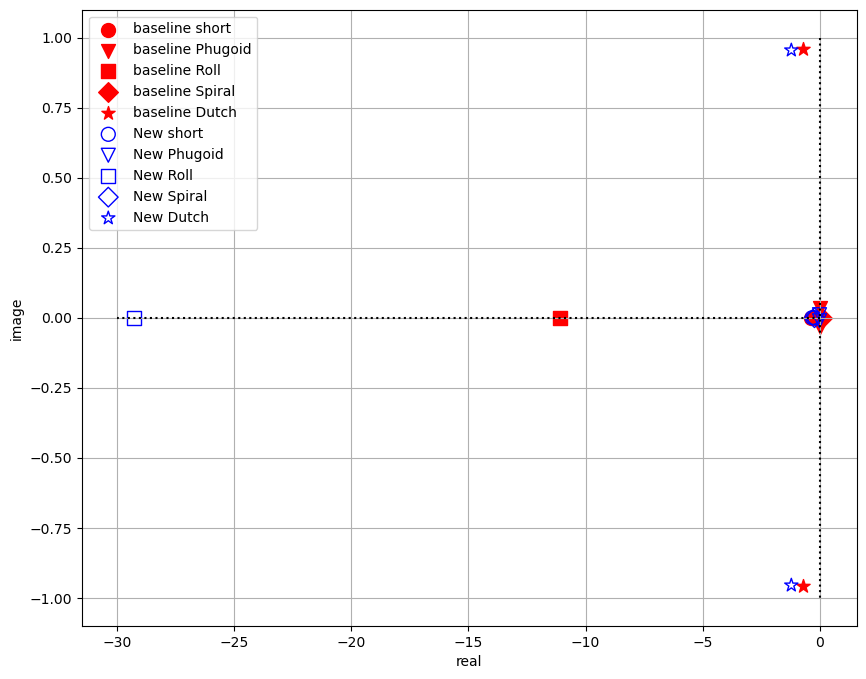

In [15]:
# ===================== eigenvalue plot ================================

fig, ax = plt.subplots(figsize=(10, 8))


ax.scatter(base.eigvals_lo[New.sort_index[-2:]].real   , base.eigvals_lo[New.sort_index[-2:]].imag   ,s=100, marker="o", c="r", label="baseline short")
ax.scatter(base.eigvals_lo[New.sort_index[-4:-2]].real , base.eigvals_lo[New.sort_index[-4:-2]].imag ,s=100, marker="v", c="r", label="baseline Phugoid")
ax.scatter(base.eig_roll.real                          , base.eig_roll.imag                          ,s=100, marker="s", c="r", label="baseline Roll")
ax.scatter(base.eig_spiral.real                        , base.eig_spiral.imag                        ,s=100, marker="D", c="r", label="baseline Spiral")
ax.scatter(base.eig_Dutch.real                         , base.eig_Dutch.imag                         ,s=100, marker="*", c="r", label="baseline Dutch")

ax.scatter(New.eigvals_lo[New.sort_index[-2:]].real   , New.eigvals_lo[New.sort_index[-2:]].imag     ,s=100, marker="o", edgecolors="b", facecolors='None', label="New short")
ax.scatter(New.eigvals_lo[New.sort_index[-4:-2]].real , New.eigvals_lo[New.sort_index[-4:-2]].imag   ,s=100, marker="v", edgecolors="b", facecolors='None', label="New Phugoid")
ax.scatter(New.eig_roll.real                          , New.eig_roll.imag                            ,s=100, marker="s", edgecolors="b", facecolors='None', label="New Roll")
ax.scatter(New.eig_spiral.real                        , New.eig_spiral.imag                          ,s=100, marker="D", edgecolors="b", facecolors='None', label="New Spiral")
ax.scatter(New.eig_Dutch.real                         , New.eig_Dutch.imag                           ,s=100, marker="*", edgecolors="b", facecolors='None', label="New Dutch")
# ax.hlines(0, 1, -10, color='black')
ax.vlines(0, 1, -1, color='black', ls=":")
ax.hlines(0, 0, -30, colors="black", ls=":")
ax.set_ylabel("image")
ax.set_xlabel("real")
plt.grid()
plt.legend()
plt.savefig('complex_plot.pdf', bbox_inches="tight")
plt.show()


In [16]:
print("\n")
print("#####################################################################")
print("#              Longitudinal                                         #")
print("#####################################################################\n")
with open("longitudinal.txt", "r", encoding="utf-8") as f:
    content = f.read()
    print(content)

print("\n")
print("#####################################################################")
print("#              Lateral                                              #")
print("#####################################################################\n")
with open("lateral.txt", "r", encoding="utf-8") as f:
    content = f.read()
    print(content)



#####################################################################
#              Longitudinal                                         #
#####################################################################

 ====================  A Matrix  ================
  -0.049079478357   0.400228625523  -0.124134628979   0.000000000000   0.000000000000  -0.627997557592
  -1.255995115184  -5.502569999022  10.730471490454   0.000000000000   0.000000000000  -0.000000000000
  -0.009123869066  -1.310199374463  -9.759199299428   0.000000000000   0.000000000000   0.000000000000
   1.000000000000   0.000000000000   0.000000000000   0.000000000000   0.000000000000  -0.000000000000
  -0.000000000000   1.000000000000   0.000000000000   0.000000000000   0.000000000000  -1.000000000000
   0.000000000000   0.000000000000   1.000000000000   0.000000000000   0.000000000000   0.000000000000
====================  B Matrix  ================
  13.089864177371   0.000000000000   0.000000000000   0.000000000000  

In [17]:
print("\n")
print("#####################################################################")
print("#              Longitudinal                                         #")
print("#####################################################################\n")
with open("longitudinal.txt", "r", encoding="utf-8") as f:
    content = f.read()
    print(content)

print("\n")
print("#####################################################################")
print("#              Lateral                                              #")
print("#####################################################################\n")
with open("lateral.txt", "r", encoding="utf-8") as f:
    content = f.read()
    print(content)



#####################################################################
#              Longitudinal                                         #
#####################################################################

 ====================  A Matrix  ================
  -0.049079478357   0.400228625523  -0.124134628979   0.000000000000   0.000000000000  -0.627997557592
  -1.255995115184  -5.502569999022  10.730471490454   0.000000000000   0.000000000000  -0.000000000000
  -0.009123869066  -1.310199374463  -9.759199299428   0.000000000000   0.000000000000   0.000000000000
   1.000000000000   0.000000000000   0.000000000000   0.000000000000   0.000000000000  -0.000000000000
  -0.000000000000   1.000000000000   0.000000000000   0.000000000000   0.000000000000  -1.000000000000
   0.000000000000   0.000000000000   1.000000000000   0.000000000000   0.000000000000   0.000000000000
====================  B Matrix  ================
  13.089864177371   0.000000000000   0.000000000000   0.000000000000  